# Drift - Comparing to Bmad

Simple 1 m drift.

In [1]:
import numpy as np
from pmd_beamphysics import single_particle
from pmd_beamphysics.units import mec2
from pytao import Tao

import impact.z as IZ
from impact.tests.z.conftest import bmad_files
from impact.z.interfaces.bmad import plot_impactz_and_tao_stats, track_tao

## Initial Particles

In [2]:
x0 = 0.001
y0 = 0.002
z0 = 0  # By definition
t0 = -1
px0 = 1e6
py0 = 2e6
energy0 = 10e6
pz0 = np.sqrt(energy0**2 - px0**2 - py0**2 - mec2**2)

P0 = single_particle(px=px0, py=py0, pz=pz0, x=x0, y=y0, z=z0, t=t0)

## Tao

In [3]:
!cat $bmad_files/drift.bmad

! Lattice file adapted from simple.bmad
no_digested
beginning[beta_a] = 10.   ! m  a-mode beta function
beginning[beta_b] = 10.   ! m  b-mode beta function
beginning[e_tot] = 10e6   ! eV   Or can set beginning[p0c]

parameter[geometry] = open          ! Or closed
parameter[particle] = electron      ! Reference particle.

d: drift, L = 1.0

lat: line = (d)
use, lat


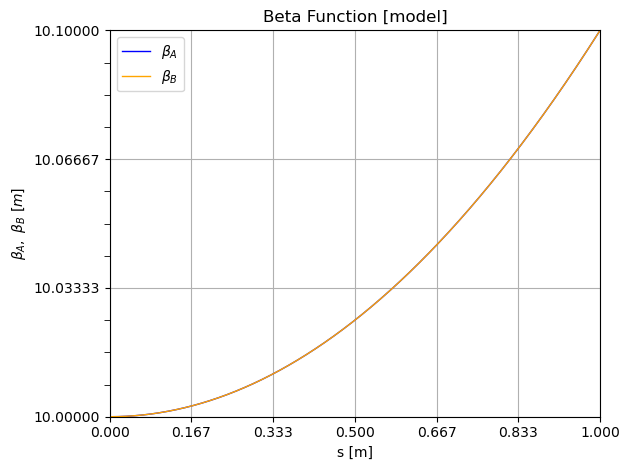

In [4]:
tao = Tao(lattice_file=bmad_files / "drift.bmad", plot="mpl")
tao.cmd("set ele * ds_step = .1")
tao.plot("beta", include_layout=False)

In [5]:
Ptao = track_tao(tao, P0)

<!-- lume-impact detected Jupyter and will use HTML for rendering. -->

  0%|          | 0/2 [00:00<?, ?ele/s]

## Impact-Z

In [6]:
I = IZ.ImpactZ.from_tao(tao, initial_particles=P0)

I.input

ImpactZInput(
    initial_particles=<ParticleGroup with 1 particles at 0x7fac090a4ad0>,
    ncpu_y=1,
    ncpu_z=1,
    gpu=IZ.GPUFlag.disabled,
    seed=-1,
    n_particle=1,
    integrator_type=IZ.IntegratorType.linear_map,
    err=1,
    diagnostic_type=IZ.DiagnosticType.extended,
    nx=64,
    ny=64,
    nz=64,
    boundary_type=IZ.BoundaryType.trans_open_longi_open,
    radius_x=0.0,
    radius_y=0.0,
    z_period_size=0.0,
    distribution=IZ.DistributionType.read,
    restart=0,
    subcycle=0,
    nbunch=1,
    particle_list=[1],
    current_list=[0.0],
    charge_over_mass_list=[-1.956951180916719e-06],
    twiss_alpha_x=0.0,
    twiss_beta_x=10.0,
    twiss_norm_emit_x=1e-06,
    twiss_mismatch_x=1.0,
    twiss_mismatch_px=1.0,
    twiss_offset_x=0.0,
    twiss_offset_px=0.0,
    twiss_alpha_y=0.0,
    twiss_beta_y=10.0,
    twiss_norm_emit_y=1e-06,
    twiss_mismatch_y=1.0,
    twiss_mismatch_py=1.0,
    twiss_offset_y=0.0,
    twiss_offset_py=0.0,
    twiss_alpha_z=1e-09,
    twiss_beta_z=1.0,
    twiss_norm_emit_z=1e-06,
    twiss_mismatch_z=1.0,
    twiss_mismatch_e_z=1.0,
    twiss_offset_phase_z=0.0,
    twiss_offset_energy_z=0.0,
    average_current=0.0,
    reference_kinetic_energy=9489001.04931,
    reference_particle_mass=510998.95069,
    reference_particle_charge=-1.0,
    reference_frequency=1300000000.0,
    initial_phase_ref=0.0,
    lattice=[
        ToggleSpaceCharge(
            name='',
            metadata={},
            length=0.0,
            steps=0,
            map_steps=0,
            type_id=-14,
            unused=0.0,
            enable=False
        ),
        WriteFull(
            name='initial_particles',
            metadata={},
            length=0.0,
            steps=0,
            file_id=100,
            type_id=-2,
            unused_2=0.0,
            sample_frequency=0
        ),
        Drift(
            name='D',
            metadata={'bmad_csr': False, 'bmad_sc': False, 'bmad_id': 1},
            length=1.0,
            steps=10,
            map_steps=10,
            type_id=0,
            radius=1.0
        ),
        WriteFull(
            name='WRITE_END',
            metadata={'bmad_id': 2},
            length=0.0,
            steps=0,
            file_id=200,
            type_id=-2,
            unused_2=0.0,
            sample_frequency=0
        ),
        WriteFull(
            name='final_particles',
            metadata={},
            length=0.0,
            steps=0,
            file_id=101,
            type_id=-2,
            unused_2=0.0,
            sample_frequency=0
        )
    ],
    filename=None,
    verbose=False
)

In [7]:
output = I.run()

<!-- lume-impact detected Jupyter and will use HTML for rendering. -->

  0%|          | 0/5 [00:00<?, ?it/s]

In [8]:
P = I.output.particles["final_particles"]

# Compare

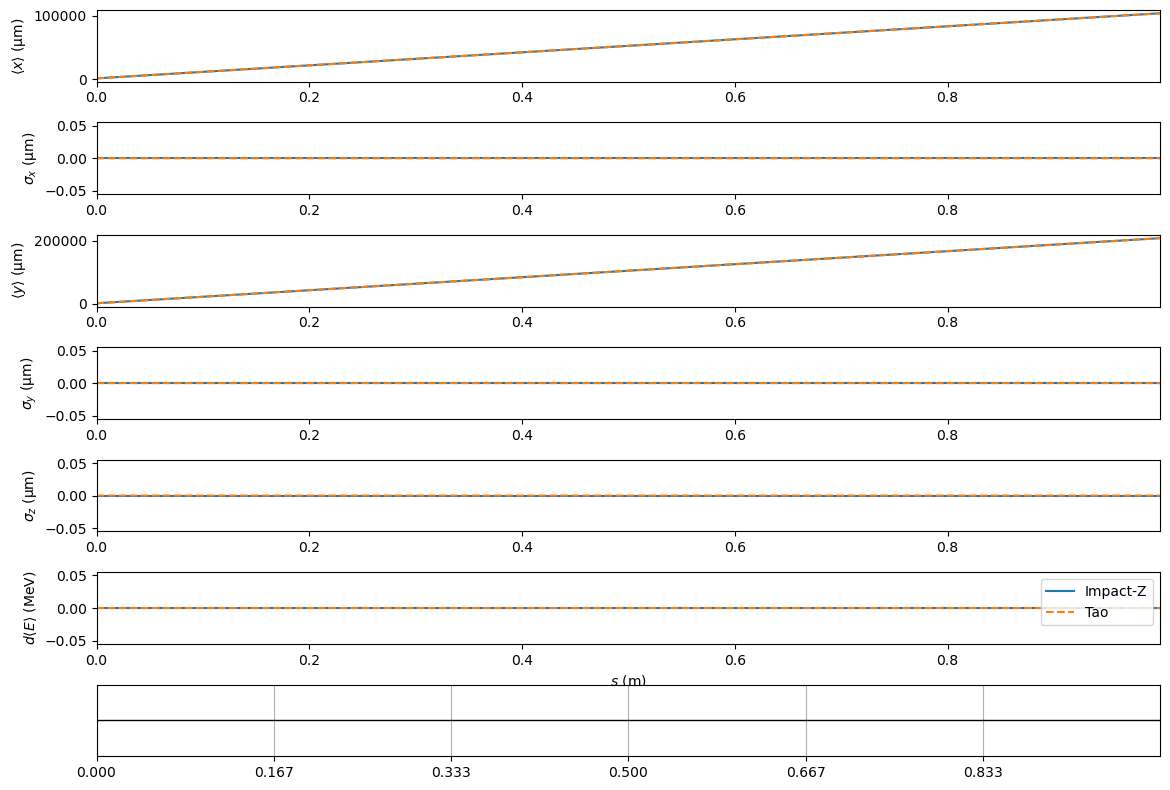

In [9]:
plot_impactz_and_tao_stats(I, tao)

In [10]:
P.data

{'x': array([0.10373913]),
 'px': array([1000000.]),
 'y': array([0.20747826]),
 'py': array([2000000.]),
 'z': array([0.]),
 'pz': array([9733389.95789205]),
 't': array([-1.]),
 'status': array([1.]),
 'weight': array([1.e-20]),
 'id': array([1]),
 'species': np.str_('electron')}

In [11]:
Ptao.data

{'x': array([0.10373913]),
 'px': array([1000000.]),
 'y': array([0.20747826]),
 'py': array([2000000.]),
 'z': array([0]),
 'pz': array([9733389.95789205]),
 't': array([-1.]),
 'status': array([1], dtype=int32),
 'weight': array([1.]),
 'species': np.str_('electron')}